<a href="https://colab.research.google.com/github/LuanaLeite/trabalho-individual/blob/main/Entrega_2_Luana_Leite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Individual para a disciplina de Introdução a Data Science**


> **Aluna**: Luana Leite Rodrigues 

> **Repositório**: https://github.com/LuanaLeite/trabalho-individual

# **Contexto**

**A empresa**: vende produtos de emagrecimento via canais digitais. Conta com uma audiência de mais de 6M de inscritos no Youtube e, aproximadamente, 980mil seguidores no Instagram. Além da produção de conteúdo orgânico, utilização de estratégias de lançamento de produto, a empresa também investe cerca de R$800 mil reais em tráfego pago por mês para captação de leads. 

**Problemática:** a empresa está no mercado desde 2019 e, recentemente, vem enfrentando novos desafios em relação ao custo de aquisição de clientes e redução de margem de lucro. Dado esse cenário, a grande pergunta feita pelo principal gestor da empresa, demandante da análise, foi "*Quem são os nossos melhores clientes? O que eles compraram?*".   



# **Dados fornecidos**

Para responder a pergunta feita pelo gestor da empresa, foi disponibilizada uma base de vendas histórica de janeiro de 2020 até novembro de 2022. A base é constituída do histórico de 5 plataformas de vendas (hotmart, guru-info, guru-sup, upnid e nutlog). Para organização e manipulação dos dados, tudo foi concatenado em excel, com trativas específicas para deixar as bases no mesmo formato e padronizar seus campos. 

Para melhor compreensão da base extraída para análise, confira o **dicionário de variáveis**: [dicionário de variáveis.](https://docs.google.com/spreadsheets/d/1h7uDHroNP6_lTfM1Is5HvlHgBBAP84sNmIXJD1hWgEo/edit?usp=sharing)

## *Coleta e pré-processamento*
A empresa forneceu a base histórica das plataformas de vendas citadas anteriormente em Excel. Em domínio da base, foi necessário realizar ajustes de padronização, tratamento de formatação de variáveis como textos, números e datas. Após as alterações, foi gerado um documento em CSV. Devido ao tamanho do arquivo não foi possível salvar no repositório do Git, por isso, o arquivo com os dados foi salvo Google Drive da aluna. 

Mesmo após o tratamento inicial realizado no Excel, foi necessário realizar ajustes após importação dos dados no Colab. Todas as datas ainda estavam sendo identificadas como "Object" e foi necessário realizar a conversão das mesmas via código para serem identificadas como "datetime64".

# **Importação dos dados**

In [1]:
# Common standard libraries

import datetime
import time
import os

In [2]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup
import math 

In [3]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Setting plot appearance

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/My Drive/base_dados_vf.csv', sep=',')

<ipython-input-7-17d116d83fd1>:1: DtypeWarning: Columns (18,19,20,21,22,23,24,25,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/My Drive/base_dados_vf.csv', sep=',')


## **Visualização da base e ajustes de tipo de dados**

In [8]:
df.shape

(193367, 39)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193367 entries, 0 to 193366
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   email_cliente            193367 non-null  object 
 1   nome_cliente             193367 non-null  object 
 2   transaction_status       193367 non-null  object 
 3   transaction_id           193366 non-null  object 
 4   data_pedido              193367 non-null  object 
 5   valor_venda              193367 non-null  float64
 6   nome_produto             193366 non-null  object 
 7   oferta                   185841 non-null  object 
 8   cep                      93669 non-null   object 
 9   pais                     186426 non-null  object 
 10  estado                   93673 non-null   object 
 11  cidade                   93669 non-null   object 
 12  classificacao_transacao  193367 non-null  object 
 13  primeiro_produto         185526 non-null  object 
 14  data

In [ ]:
df = df.astype({"dataPedido":'datetime64[ms]',
                "dataAprovacao":'datetime64[ms]',
                "dataCancelamento":'datetime64[ms]',
                "dataGarantia":'datetime64[ms]',
                "vencimento_boleto":'datetime64[ms]',
                "DataPrimeiraCompra":'datetime64[ms]'})



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224978 entries, 0 to 224977
Data columns (total 47 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   base dados              224978 non-null  object        
 1   idTransação             224974 non-null  object        
 2   marketplace             224978 non-null  object        
 3   status                  224978 non-null  object        
 4   pagamento               224978 non-null  object        
 5   parcelas                224978 non-null  int64         
 6   moeda                   224978 non-null  object        
 7   valorVenda              224978 non-null  float64       
 8   valorMarketplace        224978 non-null  float64       
 9   valorLiquido            224978 non-null  float64       
 10  valorProduto            223199 non-null  float64       
 11  valorParcela            125580 non-null  float64       
 12  idProduto               213903

In [ ]:
print(df)

       base dados                           idTransação marketplace  \
0           upnid                               1418756       upnid   
1         hotmart                      HP12915778937701     hotmart   
2         hotmart                      HP17315779087437     hotmart   
3         hotmart                      HP14315779180064     hotmart   
4         hotmart                      HP05815779272122     hotmart   
...           ...                                   ...         ...   
224973  guru_supl  97df5799-e95f-4684-9c7f-143dadd07e6b     PagarMe   
224974  guru_supl  97df5ba5-78d3-4538-91d9-5607e59058f2     PagarMe   
224975  guru_supl  97df6296-bab2-46c1-b1e1-c237d6c98cc0     PagarMe   
224976  guru_supl  97df65eb-3c34-4d17-bef6-0251ea7c45bb     PagarMe   
224977  guru_supl  97df770b-ac0d-420c-a278-43d6b5d88179     PagarMe   

            status          pagamento  parcelas moeda  valorVenda  \
0       Chargeback  Cartão de Crédito        12   BRL      447.00   
1        

In [ ]:
df.head()

,base dados,idTransação,marketplace,status,pagamento,parcelas,moeda,valorVenda,valorMarketplace,valorLiquido,...,utm_medium,utm_content,vencimento_boleto,oferta,assinaturaCódigo,assinaturaCiclo,PrimeiroProduto,DataPrimeiraCompra,#Transação,ClassificaçãoTransação
0,upnid,1418756,upnid,Chargeback,Cartão de Crédito,12,BRL,447.0,23.35,423.65,...,NaN,NaN,NaT,NaN,NaN,0,Fórmula SB3 - Kit com 3 Potes (35% Off),2019-11-28,1,Primeira Compra
1,hotmart,HP12915778937701,hotmart,Completo,Cartão de Crédito,1,BRL,99.0,8.82,90.18,...,NaN,NaN,NaT,kytlmklm,NaN,0,Ebook Detox de 15 Dias,2020-01-01,1,Primeira Compra
2,hotmart,HP17315779087437,hotmart,Completo,Cartão de Crédito,1,BRL,97.0,8.66,88.34,...,NaN,NaN,NaT,2opgc0eg,NaN,0,Kit Dayan Siebra,2020-01-01,1,Primeira Compra
3,hotmart,HP14315779180064,hotmart,Completo,Cartão de Crédito,1,BRL,99.0,8.82,90.18,...,NaN,NaN,NaT,kytlmklm,NaN,0,Ebook Detox de 15 Dias,2020-01-01,1,Primeira Compra
4,hotmart,HP05815779272122,hotmart,Completo,Boleto Bancário,1,BRL,99.0,8.82,90.18,...,NaN,NaN,NaT,kytlmklm,NaN,0,Ebook Detox de 15 Dias,2020-01-01,1,Primeira Compra


# **Análise exploratória dos dados**

In [ ]:
df[['valorLiquido']].describe()

,valorLiquido
count,224978.000000
mean,371.410874
std,328.853420
min,-0.070000
25%,143.200000
50%,206.000000
75%,538.780000
max,2498.840000


In [ ]:
df[['marketplace']].describe()

,marketplace
count,224978
unique,6
top,PagarMe
freq,124938


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelas,224978.0,6.747802e+00,4.983919e+00,1.00,1.00,6.00,12.00,1.200000e+01
valorVenda,224978.0,3.911672e+02,3.465348e+02,0.00,153.90,209.00,577.32,2.499240e+03
valorMarketplace,224978.0,3.496703e+01,5.926791e+01,0.00,3.56,16.48,36.68,8.334800e+02
valorLiquido,224978.0,3.714109e+02,3.288534e+02,-0.07,143.20,206.00,538.78,2.498840e+03
valorProduto,223199.0,3.756213e+02,1.845552e+03,0.00,153.90,206.00,499.00,8.559870e+05
valorParcela,125580.0,1.713461e+02,2.387557e+02,0.49,23.61,85.71,180.59,2.082000e+03
idProduto,213903.0,2.541295e+08,5.943162e+08,1.00,12.00,406542.00,652159.00,1.667914e+09
qtdProduto,224978.0,1.000000e+00,0.000000e+00,1.00,1.00,1.00,1.00,1.000000e+00
assinaturaCiclo,224978.0,6.672741e-01,1.242673e+00,0.00,0.00,0.00,1.00,2.900000e+01
#Transação,224978.0,2.094098e+00,2.440199e+00,1.00,1.00,1.00,2.00,7.600000e+01


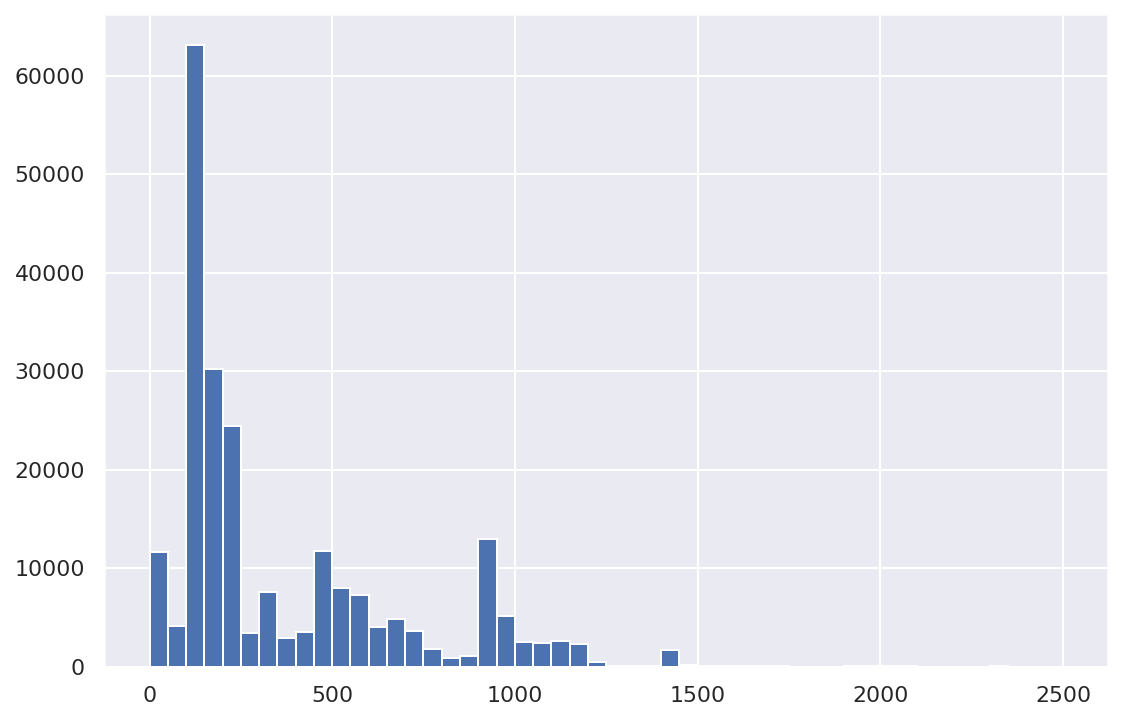

In [ ]:
df['valorLiquido'].hist(bins=50)

In [ ]:
df.groupby(['status']).count()

,base dados,idTransação,marketplace,pagamento,parcelas,moeda,valorVenda,valorMarketplace,valorLiquido,valorProduto,...,utm_medium,utm_content,vencimento_boleto,oferta,assinaturaCódigo,assinaturaCiclo,PrimeiroProduto,DataPrimeiraCompra,#Transação,ClassificaçãoTransação
status,,,,,,,,,,,,,,,,,,,,,
Aguardando Envio,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,1,1,1,1,1
Aprovada,109944,109944,109944,109944,109944,109944,109944,109944,109944,109944,...,25755,87868,105393,105626,6172,109944,109944,109944,109944,109944
Aprovado,358,358,358,358,358,358,358,358,358,358,...,0,0,0,358,0,358,358,358,358,358
Boleto Gerado,1556,1556,1556,1556,1556,1556,1556,1556,1556,1556,...,0,0,0,0,0,1556,1556,1556,1556,1556
Boleto Impresso,123,123,123,123,123,123,123,123,123,123,...,0,0,123,0,0,123,123,123,123,123
Boleto Pago,980,980,980,980,980,980,980,980,980,980,...,0,0,0,0,0,980,980,980,980,980
Cancelada,6371,6371,6371,6371,6371,6371,6371,6371,6371,6371,...,1127,6205,6085,6371,0,6371,6371,6371,6371,6371
Chargeback,4255,4255,4255,4255,4255,4255,4255,4255,4255,4255,...,0,0,0,4230,0,4255,4255,4255,4255,4255
Completa,455,455,455,455,455,455,455,455,455,455,...,0,0,0,0,0,455,455,455,455,455


In [ ]:
df.groupby(['nomeProduto']).count()

,base dados,idTransação,marketplace,status,pagamento,parcelas,moeda,valorVenda,valorMarketplace,valorLiquido,...,utm_medium,utm_content,vencimento_boleto,oferta,assinaturaCódigo,assinaturaCiclo,PrimeiroProduto,DataPrimeiraCompra,#Transação,ClassificaçãoTransação
nomeProduto,,,,,,,,,,,,,,,,,,,,,
Colágeno Tipo 2 | 30 dias,117,117,117,117,117,117,117,117,117,117,...,0,0,0,0,0,117,117,117,117,117
Colágeno Tipo 2 | Kit 60 dias,165,165,165,165,165,165,165,165,165,165,...,0,0,0,0,0,165,165,165,165,165
Colágeno Tipo 2 | Kit 90 dias,223,223,223,223,223,223,223,223,223,223,...,0,0,0,0,0,223,223,223,223,223
Detox Sistêmico,833,833,833,833,833,833,833,833,833,833,...,0,826,833,833,0,833,833,833,833,833
Ebook Detox de 15 Dias,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,...,0,0,0,1612,0,1612,1612,1612,1612,1612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ômega Vita - Kit com 7 Potes,5,5,5,5,5,5,5,5,5,5,...,0,0,5,5,0,5,5,5,5,5
Ômega Vita - Kit com 7 Potes (Frete grátis),218,218,218,218,218,218,218,218,218,218,...,57,153,218,218,0,218,218,218,218,218
Ômega Vita - Kit com 8 Potes,333,333,333,333,333,333,333,333,333,333,...,295,268,333,333,0,333,333,333,333,333


In [ ]:
cols = ['qtdProduto', 'valorLiquido']

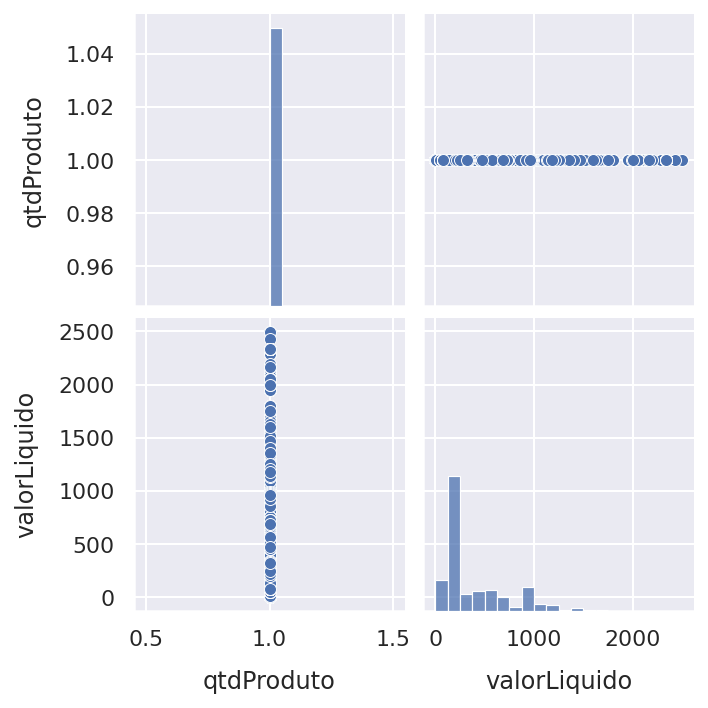

In [ ]:
sns.pairplot(df[cols],
              plot_kws={'alpha': 1},
              diag_kws={'bins': 20})

In [ ]:
pd.DataFrame(
    df.groupby(
        by='utm_source'
    )['valorLiquido', 'qtdProduto'].sum()
)

<ipython-input-35-15b796f9285a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


,valorLiquido,qtdProduto
utm_source,,
Adwords,53289.22,300
Alana,179617.00,500
Atendimento,637315.25,1554
Cintya,34948.14,95
ComunidadeAlunos,334.66,1
Cristiana,65054.30,201
Cristiana Sampaio,3086.20,6
Cristiane,179200.86,586
E-commerce,7962.24,22


In [ ]:
desconto_marketplace = df.groupby(
        by='marketplace'
    )['valorMarketplace'].sum()

desconto_marketplace

marketplace
Asaas            2.45
Hotmart       6852.32
PagarMe    2299682.24
hotmart    4767609.77
nutlog      476745.57
upnid       315921.02
Name: valorMarketplace, dtype: float64

In [ ]:
faturamento_marketplace = df.groupby(
        by='marketplace'
    )['valorLiquido'].sum()

faturamento_marketplace

marketplace
Asaas           106.55
Hotmart       91733.46
PagarMe    53760991.71
hotmart    25040565.28
nutlog       476745.57
upnid       4189133.09
Name: valorLiquido, dtype: float64

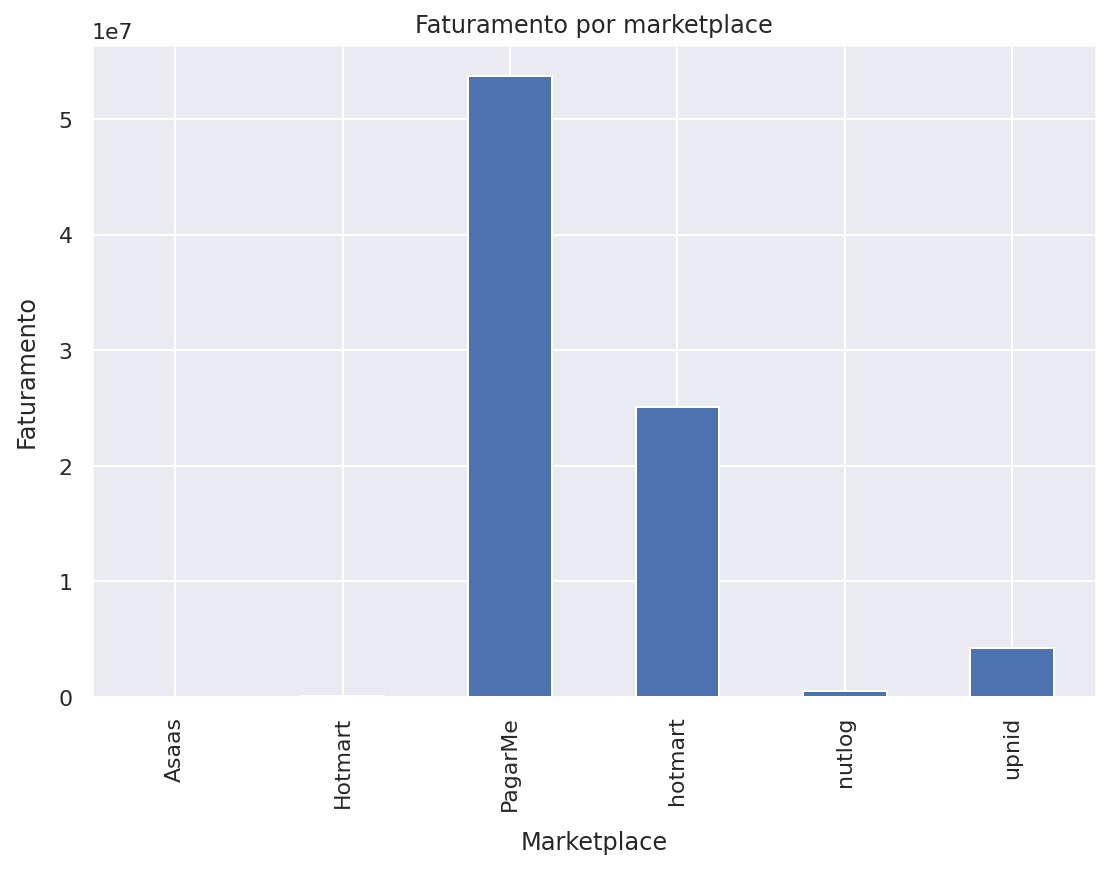

In [ ]:
ax = faturamento_marketplace.plot(
    kind='bar', 
    grid=True,
    
)

ax.set_title('Faturamento por marketplace')
ax.set_xlabel('Marketplace')
ax.set_ylabel('Faturamento')

plt.show()

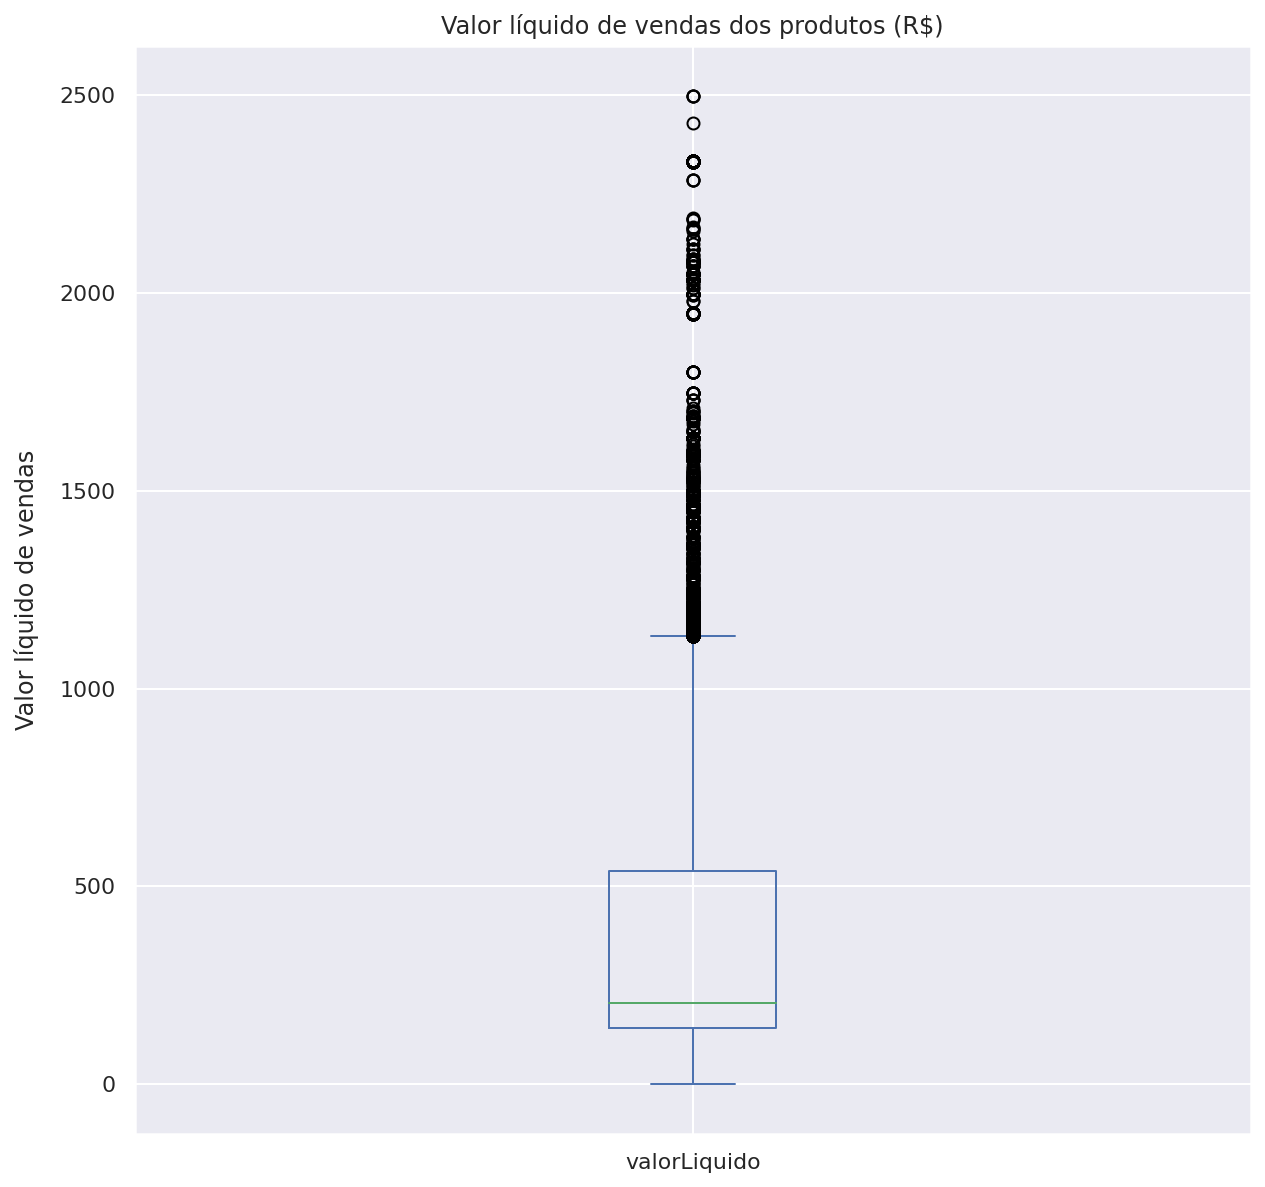

In [ ]:
ax = df[['valorLiquido']].plot(
    kind='box',
    grid=True, 
    figsize=(10, 10),

)

ax.set_ylabel('Valor líquido de vendas')
ax.set_title('Valor líquido de vendas dos produtos (R$)')

plt.show()

In [ ]:
pd.DataFrame(
    df.groupby(
        by='nomeProduto'
    )['valorLiquido', 'qtdProduto'].sum()
)

<ipython-input-55-c1da2b66dc62>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


,valorLiquido,qtdProduto
nomeProduto,,
Colágeno Tipo 2 | 30 dias,8638.455,117
Colágeno Tipo 2 | Kit 60 dias,22902.825,165
Colágeno Tipo 2 | Kit 90 dias,45473.045,223
Detox Sistêmico,604286.490,833
Ebook Detox de 15 Dias,282797.930,1612
...,...,...
Ômega Vita - Kit com 7 Potes,2946.200,5
Ômega Vita - Kit com 7 Potes (Frete grátis),137001.420,218
Ômega Vita - Kit com 8 Potes,163056.170,333


In [ ]:
faturamento_por_produto = df.groupby(
        by='nomeProduto'
    )['valorLiquido', 'qtdProduto'].sum()

faturamento_por_produto

<ipython-input-56-4e2bc3b74378>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  faturamento_por_produto = df.groupby(


,valorLiquido,qtdProduto
nomeProduto,,
Colágeno Tipo 2 | 30 dias,8638.455,117
Colágeno Tipo 2 | Kit 60 dias,22902.825,165
Colágeno Tipo 2 | Kit 90 dias,45473.045,223
Detox Sistêmico,604286.490,833
Ebook Detox de 15 Dias,282797.930,1612
...,...,...
Ômega Vita - Kit com 7 Potes,2946.200,5
Ômega Vita - Kit com 7 Potes (Frete grátis),137001.420,218
Ômega Vita - Kit com 8 Potes,163056.170,333
